## Compare windspeed squared with cflx and export

In [1]:
%reset
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/MO_pipeline/')
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS/')
import scendict as sc
import utils as ut
import netCDF4 as nc
import xarray as xr
import numpy as np
from importlib import reload
reload(sc)
reload(ut)

import cartopy as cp
import cartopy.crs as ccrs
import cmocean as cm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import glob
plt.rcParams.update({'font.size': 14})
font = {'family' : 'normal',
'weight' : 'bold',
'size'   : 14}

import time 
import pickle


Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


### basins, cell sizes

In [2]:
#### size
tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
tmesh['csize'] = tmesh.tmask[0,0,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:]
tmesh['csize'].attrs = dict(
        description="model cell area at surface, 0 if land",
        units="m^2",
    )
tmesh['csize_100'] = tmesh.tmask[0,10,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:]
tmesh['csize_100'].attrs = dict(
        description="model cell area at 100m, 0 if land",
        units="m^2",
    )

#landmask
basin =  nc.Dataset('/gpfs/data/greenocean/software/resources/ModelResources/BasinMasks/clq_basin_masks_ORCA.nc')


### load data

In [3]:
## open an mf dataset based on a list of years
ylist = ut.make_yearlist(1960,2020,'diad_T','TOM12_TJ_1AS1')
with xr.set_options(enable_cftimeindex=True):
    TJ_1AS1 = xr.open_mfdataset(ylist)
#convert time to something not-idiotic
TJ_1AS1['time_counter'] = TJ_1AS1.indexes['time_counter'].to_datetimeindex()
## select summer months

ylist = ut.make_yearlist_data(1960,2020,'diad_T','TOM12_DW_WE43')
with xr.set_options(enable_cftimeindex=True):
    DW_WE43 = xr.open_mfdataset(ylist)
DW_WE43['time_counter'] = DW_WE43.indexes['time_counter'].to_datetimeindex()

ylist = ut.make_yearlist_data(1960,2020,'diad_T','TOM12_DW_WD30')
with xr.set_options(enable_cftimeindex=True):
    DW_WD30 = xr.open_mfdataset(ylist)
DW_WD30['time_counter'] = DW_WD30.indexes['time_counter'].to_datetimeindex()

## get seasonal means (unweighted) of flux and export, by sector - let's save these because otherwise it's quite painful - processing 

In [15]:
runh = False

In [16]:

if runh:
    print('starting')
    st = time.time()
    EXP_1AS1 = TJ_1AS1.EXP[:,10,:,:]
    EXP_1AS1_pc = EXP_1AS1*tmesh.csize_100
    EXP_1AS1_pc_IND = EXP_1AS1_pc * basin['IND']
    EXP_1AS1_pc_ATL = EXP_1AS1_pc * basin['ATL']
    EXP_1AS1_pc_PAC = EXP_1AS1_pc * basin['PAC']

    Cflx_1AS1 = TJ_1AS1.Cflx
    Cflx_1AS1_pc= Cflx_1AS1*tmesh.csize
    Cflx_1AS1_pc_IND = Cflx_1AS1_pc * basin['IND']
    Cflx_1AS1_pc_ATL = Cflx_1AS1_pc * basin['ATL']
    Cflx_1AS1_pc_PAC = Cflx_1AS1_pc * basin['PAC']
    
    EXP_1AS1_pc_sum = EXP_1AS1_pc.sel(time_counter=TJ_1AS1.time_counter.dt.season == 'DJF').groupby('time_counter.year').mean()
    EXP_1AS1_pc_IND_sum = EXP_1AS1_pc_IND.sel(time_counter=TJ_1AS1.time_counter.dt.season == 'DJF').groupby('time_counter.year').mean()
    EXP_1AS1_pc_ATL_sum = EXP_1AS1_pc_ATL.sel(time_counter=TJ_1AS1.time_counter.dt.season == 'DJF').groupby('time_counter.year').mean()
    EXP_1AS1_pc_PAC_sum = EXP_1AS1_pc_PAC.sel(time_counter=TJ_1AS1.time_counter.dt.season == 'DJF').groupby('time_counter.year').mean()

    Cflx_1AS1_pc_sum = Cflx_1AS1_pc.sel(time_counter=TJ_1AS1.time_counter.dt.season == 'DJF').groupby('time_counter.year').mean()
    Cflx_1AS1_pc_IND_sum = Cflx_1AS1_pc_IND.sel(time_counter=TJ_1AS1.time_counter.dt.season == 'DJF').groupby('time_counter.year').mean()
    Cflx_1AS1_pc_ATL_sum = Cflx_1AS1_pc_ATL.sel(time_counter=TJ_1AS1.time_counter.dt.season == 'DJF').groupby('time_counter.year').mean()
    Cflx_1AS1_pc_PAC_sum = Cflx_1AS1_pc_PAC.sel(time_counter=TJ_1AS1.time_counter.dt.season == 'DJF').groupby('time_counter.year').mean()

    EXP_1AS1_pc_win = EXP_1AS1_pc.sel(time_counter=TJ_1AS1.time_counter.dt.season == 'JJA').groupby('time_counter.year').mean()
    EXP_1AS1_pc_IND_win = EXP_1AS1_pc_IND.sel(time_counter=TJ_1AS1.time_counter.dt.season == 'JJA').groupby('time_counter.year').mean()
    EXP_1AS1_pc_ATL_win = EXP_1AS1_pc_ATL.sel(time_counter=TJ_1AS1.time_counter.dt.season == 'JJA').groupby('time_counter.year').mean()
    EXP_1AS1_pc_PAC_win = EXP_1AS1_pc_PAC.sel(time_counter=TJ_1AS1.time_counter.dt.season == 'JJA').groupby('time_counter.year').mean()

    Cflx_1AS1_pc_win = Cflx_1AS1_pc.sel(time_counter=TJ_1AS1.time_counter.dt.season == 'JJA').groupby('time_counter.year').mean()
    Cflx_1AS1_pc_IND_win = Cflx_1AS1_pc_IND.sel(time_counter=TJ_1AS1.time_counter.dt.season == 'JJA').groupby('time_counter.year').mean()
    Cflx_1AS1_pc_ATL_win = Cflx_1AS1_pc_ATL.sel(time_counter=TJ_1AS1.time_counter.dt.season == 'JJA').groupby('time_counter.year').mean()
    Cflx_1AS1_pc_PAC_win = Cflx_1AS1_pc_PAC.sel(time_counter=TJ_1AS1.time_counter.dt.season == 'JJA').groupby('time_counter.year').mean()

    EXP_1AS1_pc_sum_mn = np.nansum(np.nansum(EXP_1AS1_pc_sum[:,0:37,:], axis = 2), axis = 1)
    EXP_1AS1_pc_IND_sum_mn = np.nansum(np.nansum(EXP_1AS1_pc_IND_sum[:,0:37,:], axis = 2), axis = 1)
    EXP_1AS1_pc_ATL_sum_mn = np.nansum(np.nansum(EXP_1AS1_pc_ATL_sum[:,0:37,:], axis = 2), axis = 1)
    EXP_1AS1_pc_PAC_sum_mn = np.nansum(np.nansum(EXP_1AS1_pc_PAC_sum[:,0:37,:], axis = 2), axis = 1)

    EXP_1AS1_pc_win_mn = np.nansum(np.nansum(EXP_1AS1_pc_win[:,0:37,:], axis = 2), axis = 1)
    EXP_1AS1_pc_IND_win_mn = np.nansum(np.nansum(EXP_1AS1_pc_IND_win[:,0:37,:], axis = 2), axis = 1)
    EXP_1AS1_pc_ATL_win_mn = np.nansum(np.nansum(EXP_1AS1_pc_ATL_win[:,0:37,:], axis = 2), axis = 1)
    EXP_1AS1_pc_PAC_win_mn = np.nansum(np.nansum(EXP_1AS1_pc_PAC_win[:,0:37,:], axis = 2), axis = 1)

    Cflx_1AS1_pc_sum_mn = np.nansum(np.nansum(Cflx_1AS1_pc_sum[:,0:37,:], axis = 2), axis = 1)
    Cflx_1AS1_pc_IND_sum_mn = np.nansum(np.nansum(Cflx_1AS1_pc_IND_sum[:,0:37,:], axis = 2), axis = 1)
    Cflx_1AS1_pc_ATL_sum_mn = np.nansum(np.nansum(Cflx_1AS1_pc_ATL_sum[:,0:37,:], axis = 2), axis = 1)
    Cflx_1AS1_pc_PAC_sum_mn = np.nansum(np.nansum(Cflx_1AS1_pc_PAC_sum[:,0:37,:], axis = 2), axis = 1)

    Cflx_1AS1_pc_win_mn = np.nansum(np.nansum(Cflx_1AS1_pc_win[:,0:37,:], axis = 2), axis = 1)
    Cflx_1AS1_pc_IND_win_mn = np.nansum(np.nansum(Cflx_1AS1_pc_IND_win[:,0:37,:], axis = 2), axis = 1)
    Cflx_1AS1_pc_ATL_win_mn = np.nansum(np.nansum(Cflx_1AS1_pc_ATL_win[:,0:37,:], axis = 2), axis = 1)
    Cflx_1AS1_pc_PAC_win_mn = np.nansum(np.nansum(Cflx_1AS1_pc_PAC_win[:,0:37,:], axis = 2), axis = 1)
    # Saving the objects:
    with open('./pkls/Cflx_1AS1_sum.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
        pickle.dump([Cflx_1AS1_pc_sum_mn, Cflx_1AS1_pc_IND_sum_mn, Cflx_1AS1_pc_ATL_sum_mn, Cflx_1AS1_pc_PAC_sum_mn], f)
    with open('./pkls/Cflx_1AS1_win.pkl', 'wb') as f:
        pickle.dump([Cflx_1AS1_pc_win_mn, Cflx_1AS1_pc_IND_win_mn, Cflx_1AS1_pc_ATL_win_mn, Cflx_1AS1_pc_PAC_win_mn], f)
    with open('./pkls/EXP_1AS1_sum.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
        pickle.dump([EXP_1AS1_pc_sum_mn, EXP_1AS1_pc_IND_sum_mn, EXP_1AS1_pc_ATL_sum_mn, EXP_1AS1_pc_PAC_sum_mn], f)
    with open('./pkls/EXP_1AS1_win.pkl', 'wb') as f:
        pickle.dump([EXP_1AS1_pc_win_mn, EXP_1AS1_pc_IND_win_mn, EXP_1AS1_pc_ATL_win_mn, EXP_1AS1_pc_PAC_win_mn], f)
    en = time.time()
    print((st-en)/60)

In [17]:

if runh:
    print('GO')
    st = time.time()
    EXP_WE43 = DW_WE43.EXP[:,10,:,:]
    EXP_WE43_pc = EXP_WE43*tmesh.csize_100
    EXP_WE43_pc_IND = EXP_WE43_pc * basin['IND']
    EXP_WE43_pc_ATL = EXP_WE43_pc * basin['ATL']
    EXP_WE43_pc_PAC = EXP_WE43_pc * basin['PAC']

    Cflx_WE43 = DW_WE43.Cflx
    Cflx_WE43_pc= Cflx_WE43*tmesh.csize
    Cflx_WE43_pc_IND = Cflx_WE43_pc * basin['IND']
    Cflx_WE43_pc_ATL = Cflx_WE43_pc * basin['ATL']
    Cflx_WE43_pc_PAC = Cflx_WE43_pc * basin['PAC']
    
    EXP_WE43_pc_sum = EXP_WE43_pc.sel(time_counter=DW_WE43.time_counter.dt.season == 'DJF').groupby('time_counter.year').mean()
    EXP_WE43_pc_IND_sum = EXP_WE43_pc_IND.sel(time_counter=DW_WE43.time_counter.dt.season == 'DJF').groupby('time_counter.year').mean()
    EXP_WE43_pc_ATL_sum = EXP_WE43_pc_ATL.sel(time_counter=DW_WE43.time_counter.dt.season == 'DJF').groupby('time_counter.year').mean()
    EXP_WE43_pc_PAC_sum = EXP_WE43_pc_PAC.sel(time_counter=DW_WE43.time_counter.dt.season == 'DJF').groupby('time_counter.year').mean()

    Cflx_WE43_pc_sum = Cflx_WE43_pc.sel(time_counter=DW_WE43.time_counter.dt.season == 'DJF').groupby('time_counter.year').mean()
    Cflx_WE43_pc_IND_sum = Cflx_WE43_pc_IND.sel(time_counter=DW_WE43.time_counter.dt.season == 'DJF').groupby('time_counter.year').mean()
    Cflx_WE43_pc_ATL_sum = Cflx_WE43_pc_ATL.sel(time_counter=DW_WE43.time_counter.dt.season == 'DJF').groupby('time_counter.year').mean()
    Cflx_WE43_pc_PAC_sum = Cflx_WE43_pc_PAC.sel(time_counter=DW_WE43.time_counter.dt.season == 'DJF').groupby('time_counter.year').mean()

    EXP_WE43_pc_win = EXP_WE43_pc.sel(time_counter=DW_WE43.time_counter.dt.season == 'JJA').groupby('time_counter.year').mean()
    EXP_WE43_pc_IND_win = EXP_WE43_pc_IND.sel(time_counter=DW_WE43.time_counter.dt.season == 'JJA').groupby('time_counter.year').mean()
    EXP_WE43_pc_ATL_win = EXP_WE43_pc_ATL.sel(time_counter=DW_WE43.time_counter.dt.season == 'JJA').groupby('time_counter.year').mean()
    EXP_WE43_pc_PAC_win = EXP_WE43_pc_PAC.sel(time_counter=DW_WE43.time_counter.dt.season == 'JJA').groupby('time_counter.year').mean()

    Cflx_WE43_pc_win = Cflx_WE43_pc.sel(time_counter=DW_WE43.time_counter.dt.season == 'JJA').groupby('time_counter.year').mean()
    Cflx_WE43_pc_IND_win = Cflx_WE43_pc_IND.sel(time_counter=DW_WE43.time_counter.dt.season == 'JJA').groupby('time_counter.year').mean()
    Cflx_WE43_pc_ATL_win = Cflx_WE43_pc_ATL.sel(time_counter=DW_WE43.time_counter.dt.season == 'JJA').groupby('time_counter.year').mean()
    Cflx_WE43_pc_PAC_win = Cflx_WE43_pc_PAC.sel(time_counter=DW_WE43.time_counter.dt.season == 'JJA').groupby('time_counter.year').mean()

    EXP_WE43_pc_sum_mn = np.nansum(np.nansum(EXP_WE43_pc_sum[:,0:37,:], axis = 2), axis = 1)
    EXP_WE43_pc_IND_sum_mn = np.nansum(np.nansum(EXP_WE43_pc_IND_sum[:,0:37,:], axis = 2), axis = 1)
    EXP_WE43_pc_ATL_sum_mn = np.nansum(np.nansum(EXP_WE43_pc_ATL_sum[:,0:37,:], axis = 2), axis = 1)
    EXP_WE43_pc_PAC_sum_mn = np.nansum(np.nansum(EXP_WE43_pc_PAC_sum[:,0:37,:], axis = 2), axis = 1)

    EXP_WE43_pc_win_mn = np.nansum(np.nansum(EXP_WE43_pc_win[:,0:37,:], axis = 2), axis = 1)
    EXP_WE43_pc_IND_win_mn = np.nansum(np.nansum(EXP_WE43_pc_IND_win[:,0:37,:], axis = 2), axis = 1)
    EXP_WE43_pc_ATL_win_mn = np.nansum(np.nansum(EXP_WE43_pc_ATL_win[:,0:37,:], axis = 2), axis = 1)
    EXP_WE43_pc_PAC_win_mn = np.nansum(np.nansum(EXP_WE43_pc_PAC_win[:,0:37,:], axis = 2), axis = 1)

    Cflx_WE43_pc_sum_mn = np.nansum(np.nansum(Cflx_WE43_pc_sum[:,0:37,:], axis = 2), axis = 1)
    Cflx_WE43_pc_IND_sum_mn = np.nansum(np.nansum(Cflx_WE43_pc_IND_sum[:,0:37,:], axis = 2), axis = 1)
    Cflx_WE43_pc_ATL_sum_mn = np.nansum(np.nansum(Cflx_WE43_pc_ATL_sum[:,0:37,:], axis = 2), axis = 1)
    Cflx_WE43_pc_PAC_sum_mn = np.nansum(np.nansum(Cflx_WE43_pc_PAC_sum[:,0:37,:], axis = 2), axis = 1)

    Cflx_WE43_pc_win_mn = np.nansum(np.nansum(Cflx_WE43_pc_win[:,0:37,:], axis = 2), axis = 1)
    Cflx_WE43_pc_IND_win_mn = np.nansum(np.nansum(Cflx_WE43_pc_IND_win[:,0:37,:], axis = 2), axis = 1)
    Cflx_WE43_pc_ATL_win_mn = np.nansum(np.nansum(Cflx_WE43_pc_ATL_win[:,0:37,:], axis = 2), axis = 1)
    Cflx_WE43_pc_PAC_win_mn = np.nansum(np.nansum(Cflx_WE43_pc_PAC_win[:,0:37,:], axis = 2), axis = 1)
    # Saving the objects:
    with open('./pkls/Cflx_WE43_sum.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
        pickle.dump([Cflx_WE43_pc_sum_mn, Cflx_WE43_pc_IND_sum_mn, Cflx_WE43_pc_ATL_sum_mn, Cflx_WE43_pc_PAC_sum_mn], f)
    with open('./pkls/Cflx_WE43_win.pkl', 'wb') as f:
        pickle.dump([Cflx_WE43_pc_win_mn, Cflx_WE43_pc_IND_win_mn, Cflx_WE43_pc_ATL_win_mn, Cflx_WE43_pc_PAC_win_mn], f)
    with open('./pkls/EXP_WE43_sum.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
        pickle.dump([EXP_WE43_pc_sum_mn, EXP_WE43_pc_IND_sum_mn, EXP_WE43_pc_ATL_sum_mn, EXP_WE43_pc_PAC_sum_mn], f)
    with open('./pkls/EXP_WE43_win.pkl', 'wb') as f:
        pickle.dump([EXP_WE43_pc_win_mn, EXP_WE43_pc_IND_win_mn, EXP_WE43_pc_ATL_win_mn, EXP_WE43_pc_PAC_win_mn], f)
    en = time.time()
    print((st-en)/60)

In [18]:

if runh:
    print('GO')
    st = time.time()
    EXP_WD30 = DW_WD30.EXP[:,10,:,:]
    EXP_WD30_pc = EXP_WD30*tmesh.csize_100
    EXP_WD30_pc_IND = EXP_WD30_pc * basin['IND']
    EXP_WD30_pc_ATL = EXP_WD30_pc * basin['ATL']
    EXP_WD30_pc_PAC = EXP_WD30_pc * basin['PAC']

    Cflx_WD30 = DW_WD30.Cflx
    Cflx_WD30_pc= Cflx_WD30*tmesh.csize
    Cflx_WD30_pc_IND = Cflx_WD30_pc * basin['IND']
    Cflx_WD30_pc_ATL = Cflx_WD30_pc * basin['ATL']
    Cflx_WD30_pc_PAC = Cflx_WD30_pc * basin['PAC']
    
    EXP_WD30_pc_sum = EXP_WD30_pc.sel(time_counter=DW_WD30.time_counter.dt.season == 'DJF').groupby('time_counter.year').mean()
    EXP_WD30_pc_IND_sum = EXP_WD30_pc_IND.sel(time_counter=DW_WD30.time_counter.dt.season == 'DJF').groupby('time_counter.year').mean()
    EXP_WD30_pc_ATL_sum = EXP_WD30_pc_ATL.sel(time_counter=DW_WD30.time_counter.dt.season == 'DJF').groupby('time_counter.year').mean()
    EXP_WD30_pc_PAC_sum = EXP_WD30_pc_PAC.sel(time_counter=DW_WD30.time_counter.dt.season == 'DJF').groupby('time_counter.year').mean()

    Cflx_WD30_pc_sum = Cflx_WD30_pc.sel(time_counter=DW_WD30.time_counter.dt.season == 'DJF').groupby('time_counter.year').mean()
    Cflx_WD30_pc_IND_sum = Cflx_WD30_pc_IND.sel(time_counter=DW_WD30.time_counter.dt.season == 'DJF').groupby('time_counter.year').mean()
    Cflx_WD30_pc_ATL_sum = Cflx_WD30_pc_ATL.sel(time_counter=DW_WD30.time_counter.dt.season == 'DJF').groupby('time_counter.year').mean()
    Cflx_WD30_pc_PAC_sum = Cflx_WD30_pc_PAC.sel(time_counter=DW_WD30.time_counter.dt.season == 'DJF').groupby('time_counter.year').mean()

    EXP_WD30_pc_win = EXP_WD30_pc.sel(time_counter=DW_WD30.time_counter.dt.season == 'JJA').groupby('time_counter.year').mean()
    EXP_WD30_pc_IND_win = EXP_WD30_pc_IND.sel(time_counter=DW_WD30.time_counter.dt.season == 'JJA').groupby('time_counter.year').mean()
    EXP_WD30_pc_ATL_win = EXP_WD30_pc_ATL.sel(time_counter=DW_WD30.time_counter.dt.season == 'JJA').groupby('time_counter.year').mean()
    EXP_WD30_pc_PAC_win = EXP_WD30_pc_PAC.sel(time_counter=DW_WD30.time_counter.dt.season == 'JJA').groupby('time_counter.year').mean()

    Cflx_WD30_pc_win = Cflx_WD30_pc.sel(time_counter=DW_WD30.time_counter.dt.season == 'JJA').groupby('time_counter.year').mean()
    Cflx_WD30_pc_IND_win = Cflx_WD30_pc_IND.sel(time_counter=DW_WD30.time_counter.dt.season == 'JJA').groupby('time_counter.year').mean()
    Cflx_WD30_pc_ATL_win = Cflx_WD30_pc_ATL.sel(time_counter=DW_WD30.time_counter.dt.season == 'JJA').groupby('time_counter.year').mean()
    Cflx_WD30_pc_PAC_win = Cflx_WD30_pc_PAC.sel(time_counter=DW_WD30.time_counter.dt.season == 'JJA').groupby('time_counter.year').mean()

    EXP_WD30_pc_sum_mn = np.nansum(np.nansum(EXP_WD30_pc_sum[:,0:37,:], axis = 2), axis = 1)
    EXP_WD30_pc_IND_sum_mn = np.nansum(np.nansum(EXP_WD30_pc_IND_sum[:,0:37,:], axis = 2), axis = 1)
    EXP_WD30_pc_ATL_sum_mn = np.nansum(np.nansum(EXP_WD30_pc_ATL_sum[:,0:37,:], axis = 2), axis = 1)
    EXP_WD30_pc_PAC_sum_mn = np.nansum(np.nansum(EXP_WD30_pc_PAC_sum[:,0:37,:], axis = 2), axis = 1)

    EXP_WD30_pc_win_mn = np.nansum(np.nansum(EXP_WD30_pc_win[:,0:37,:], axis = 2), axis = 1)
    EXP_WD30_pc_IND_win_mn = np.nansum(np.nansum(EXP_WD30_pc_IND_win[:,0:37,:], axis = 2), axis = 1)
    EXP_WD30_pc_ATL_win_mn = np.nansum(np.nansum(EXP_WD30_pc_ATL_win[:,0:37,:], axis = 2), axis = 1)
    EXP_WD30_pc_PAC_win_mn = np.nansum(np.nansum(EXP_WD30_pc_PAC_win[:,0:37,:], axis = 2), axis = 1)

    Cflx_WD30_pc_sum_mn = np.nansum(np.nansum(Cflx_WD30_pc_sum[:,0:37,:], axis = 2), axis = 1)
    Cflx_WD30_pc_IND_sum_mn = np.nansum(np.nansum(Cflx_WD30_pc_IND_sum[:,0:37,:], axis = 2), axis = 1)
    Cflx_WD30_pc_ATL_sum_mn = np.nansum(np.nansum(Cflx_WD30_pc_ATL_sum[:,0:37,:], axis = 2), axis = 1)
    Cflx_WD30_pc_PAC_sum_mn = np.nansum(np.nansum(Cflx_WD30_pc_PAC_sum[:,0:37,:], axis = 2), axis = 1)

    Cflx_WD30_pc_win_mn = np.nansum(np.nansum(Cflx_WD30_pc_win[:,0:37,:], axis = 2), axis = 1)
    Cflx_WD30_pc_IND_win_mn = np.nansum(np.nansum(Cflx_WD30_pc_IND_win[:,0:37,:], axis = 2), axis = 1)
    Cflx_WD30_pc_ATL_win_mn = np.nansum(np.nansum(Cflx_WD30_pc_ATL_win[:,0:37,:], axis = 2), axis = 1)
    Cflx_WD30_pc_PAC_win_mn = np.nansum(np.nansum(Cflx_WD30_pc_PAC_win[:,0:37,:], axis = 2), axis = 1)
    # Saving the objects:
    with open('./pkls/Cflx_WD30_sum.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
        pickle.dump([Cflx_WD30_pc_sum_mn, Cflx_WD30_pc_IND_sum_mn, Cflx_WD30_pc_ATL_sum_mn, Cflx_WD30_pc_PAC_sum_mn], f)
    with open('./pkls/Cflx_WD30_win.pkl', 'wb') as f:
        pickle.dump([Cflx_WD30_pc_win_mn, Cflx_WD30_pc_IND_win_mn, Cflx_WD30_pc_ATL_win_mn, Cflx_WD30_pc_PAC_win_mn], f)
    with open('./pkls/EXP_WD30_sum.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
        pickle.dump([EXP_WD30_pc_sum_mn, EXP_WD30_pc_IND_sum_mn, EXP_WD30_pc_ATL_sum_mn, EXP_WD30_pc_PAC_sum_mn], f)
    with open('./pkls/EXP_WD30_win.pkl', 'wb') as f:
        pickle.dump([EXP_WD30_pc_win_mn, EXP_WD30_pc_IND_win_mn, EXP_WD30_pc_ATL_win_mn, EXP_WD30_pc_PAC_win_mn], f)
    en = time.time()
    print((st-en)/60)

In [19]:
with open('./pkls/Cflx_1AS1_win.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    Cflx_1AS1_pc_win_mn, Cflx_1AS1_pc_IND_win_mn, Cflx_1AS1_pc_ATL_win_mn, Cflx_1AS1_pc_PAC_win_mn = pickle.load(f)
with open('./pkls/Cflx_1AS1_sum.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    Cflx_1AS1_pc_sum_mn, Cflx_1AS1_pc_IND_sum_mn, Cflx_1AS1_pc_ATL_sum_mn, Cflx_1AS1_pc_PAC_sum_mn = pickle.load(f)
with open('./pkls/Cflx_WE43_win.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    Cflx_WE43_pc_win_mn, Cflx_WE43_pc_IND_win_mn, Cflx_WE43_pc_ATL_win_mn, Cflx_WE43_pc_PAC_win_mn = pickle.load(f)
with open('./pkls/Cflx_WE43_sum.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    Cflx_WE43_pc_sum_mn, Cflx_WE43_pc_IND_sum_mn, Cflx_WE43_pc_ATL_sum_mn, Cflx_WE43_pc_PAC_sum_mn = pickle.load(f)
with open('./pkls/Cflx_WD30_win.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    Cflx_WD30_pc_win_mn, Cflx_WD30_pc_IND_win_mn, Cflx_WD30_pc_ATL_win_mn, Cflx_WD30_pc_PAC_win_mn = pickle.load(f)
with open('./pkls/Cflx_WD30_sum.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    Cflx_WD30_pc_sum_mn, Cflx_WD30_pc_IND_sum_mn, Cflx_WD30_pc_ATL_sum_mn, Cflx_WD30_pc_PAC_sum_mn = pickle.load(f)

with open('./pkls/EXP_1AS1_win.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    EXP_1AS1_pc_win_mn, EXP_1AS1_pc_IND_win_mn, EXP_1AS1_pc_ATL_win_mn, EXP_1AS1_pc_PAC_win_mn = pickle.load(f)
with open('./pkls/EXP_1AS1_sum.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    EXP_1AS1_pc_sum_mn, EXP_1AS1_pc_IND_sum_mn, EXP_1AS1_pc_ATL_sum_mn, EXP_1AS1_pc_PAC_sum_mn = pickle.load(f)
with open('./pkls/EXP_WE43_win.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    EXP_WE43_pc_win_mn, EXP_WE43_pc_IND_win_mn, EXP_WE43_pc_ATL_win_mn, EXP_WE43_pc_PAC_win_mn = pickle.load(f)
with open('./pkls/EXP_WE43_sum.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    EXP_WE43_pc_sum_mn, EXP_WE43_pc_IND_sum_mn, EXP_WE43_pc_ATL_sum_mn, EXP_WE43_pc_PAC_sum_mn = pickle.load(f)
with open('./pkls/EXP_WD30_win.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    EXP_WD30_pc_win_mn, EXP_WD30_pc_IND_win_mn, EXP_WD30_pc_ATL_win_mn, EXP_WD30_pc_PAC_win_mn = pickle.load(f)
with open('./pkls/EXP_WD30_sum.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    EXP_WD30_pc_sum_mn, EXP_WD30_pc_IND_sum_mn, EXP_WD30_pc_ATL_sum_mn, EXP_WD30_pc_PAC_sum_mn = pickle.load(f)


In [20]:
Cflx_1AS1_st = [Cflx_1AS1_pc_sum_mn, Cflx_1AS1_pc_win_mn,
             Cflx_1AS1_pc_ATL_sum_mn, Cflx_1AS1_pc_ATL_win_mn,
             Cflx_1AS1_pc_PAC_sum_mn, Cflx_1AS1_pc_PAC_win_mn,
             Cflx_1AS1_pc_IND_sum_mn, Cflx_1AS1_pc_IND_win_mn]
Cflx_WE43_st = [Cflx_WE43_pc_sum_mn, Cflx_WE43_pc_win_mn,
             Cflx_WE43_pc_ATL_sum_mn, Cflx_WE43_pc_ATL_win_mn,
             Cflx_WE43_pc_PAC_sum_mn, Cflx_WE43_pc_PAC_win_mn,
             Cflx_WE43_pc_IND_sum_mn, Cflx_WE43_pc_IND_win_mn]
Cflx_WD30_st = [Cflx_WD30_pc_sum_mn, Cflx_WD30_pc_win_mn,
             Cflx_WD30_pc_ATL_sum_mn, Cflx_WD30_pc_ATL_win_mn,
             Cflx_WD30_pc_PAC_sum_mn, Cflx_WD30_pc_PAC_win_mn,
             Cflx_WD30_pc_IND_sum_mn, Cflx_WD30_pc_IND_win_mn]

EXP_1AS1_st = [EXP_1AS1_pc_sum_mn, EXP_1AS1_pc_win_mn,
             EXP_1AS1_pc_ATL_sum_mn, EXP_1AS1_pc_ATL_win_mn,
             EXP_1AS1_pc_PAC_sum_mn, EXP_1AS1_pc_PAC_win_mn,
             EXP_1AS1_pc_IND_sum_mn, EXP_1AS1_pc_IND_win_mn]
EXP_WE43_st = [EXP_WE43_pc_sum_mn, EXP_WE43_pc_win_mn,
             EXP_WE43_pc_ATL_sum_mn, EXP_WE43_pc_ATL_win_mn,
             EXP_WE43_pc_PAC_sum_mn, EXP_WE43_pc_PAC_win_mn,
             EXP_WE43_pc_IND_sum_mn, EXP_WE43_pc_IND_win_mn]
EXP_WD30_st = [EXP_WD30_pc_sum_mn, EXP_WD30_pc_win_mn,
             EXP_WD30_pc_ATL_sum_mn, EXP_WD30_pc_ATL_win_mn,
             EXP_WD30_pc_PAC_sum_mn, EXP_WD30_pc_PAC_win_mn,
             EXP_WD30_pc_IND_sum_mn, EXP_WD30_pc_IND_win_mn]

In [21]:
EXP_1AS1 = TJ_1AS1.EXP[:,10,:,:]
EXP_1AS1_pc = EXP_1AS1*tmesh.csize_100
EXP_1AS1_pc_sum = EXP_1AS1_pc.sel(time_counter=TJ_1AS1.time_counter.dt.season == 'DJF').groupby('time_counter.year').mean()
yr_forplot = EXP_1AS1_pc_sum.year

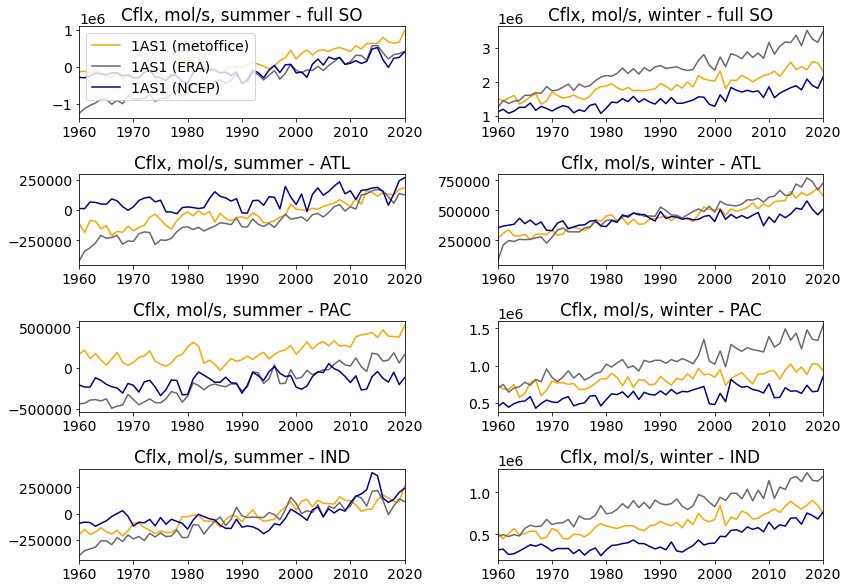

In [22]:
# appropriate date

tit = ['summer - full SO', 'winter - full SO','summer - ATL', 'winter - ATL',\
       'summer - PAC', 'winter - PAC','summer - IND', 'winter - IND']
fact = 0.6

fig, axs = plt.subplots(4,2, figsize=(20*fact, 14*fact), facecolor='w', edgecolor='k')

axs = axs.ravel()
for i in range(0,8):
    axs[i].plot(yr_forplot,Cflx_1AS1_st[i], color = sc.scen['1A']['color'], label = '1AS1 (metoffice)')
    axs[i].plot(yr_forplot,Cflx_WE43_st[i], color = 'dimgrey', label = '1AS1 (ERA)')
    axs[i].plot(yr_forplot,Cflx_WD30_st[i], color = 'darkblue', label = '1AS1 (NCEP)')
    axs[i].set_title(f'Cflx, mol/s, {tit[i]}')
    axs[0].legend()
    axs[i].set_xlim([1960,2020])
plt.tight_layout()

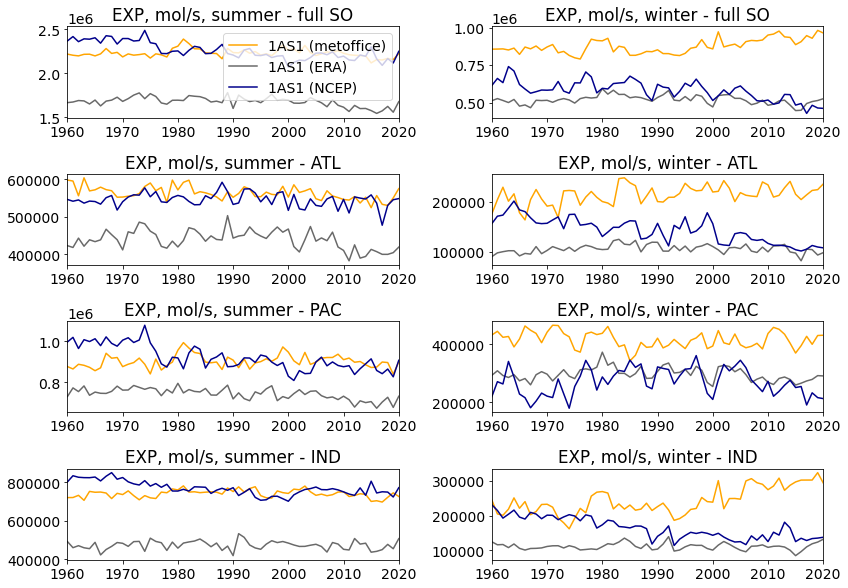

In [23]:
# appropriate date

tit = ['summer - full SO', 'winter - full SO','summer - ATL', 'winter - ATL',\
       'summer - PAC', 'winter - PAC','summer - IND', 'winter - IND']
fact = 0.6

fig, axs = plt.subplots(4,2, figsize=(20*fact, 14*fact), facecolor='w', edgecolor='k')

axs = axs.ravel()
for i in range(0,8):
    axs[i].plot(yr_forplot,EXP_1AS1_st[i], color = sc.scen['1A']['color'], label = '1AS1 (metoffice)')
    axs[i].plot(yr_forplot,EXP_WE43_st[i], color = 'dimgrey', label = '1AS1 (ERA)')
    axs[i].plot(yr_forplot,EXP_WD30_st[i], color = 'darkblue', label = '1AS1 (NCEP)')
    axs[i].set_title(f'EXP, mol/s, {tit[i]}')
    axs[0].legend()
    axs[i].set_xlim([1960,2020])
plt.tight_layout()